Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pickle import dump
from pickle import load

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV, SelectKBest
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

 Load dataset

In [4]:
data = pd.read_csv("data.csv")
random_state=1

In [5]:
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

Descriptive statistics

In [6]:
data.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

<AxesSubplot:title={'center':'Count of Bankrupt Companies'}>

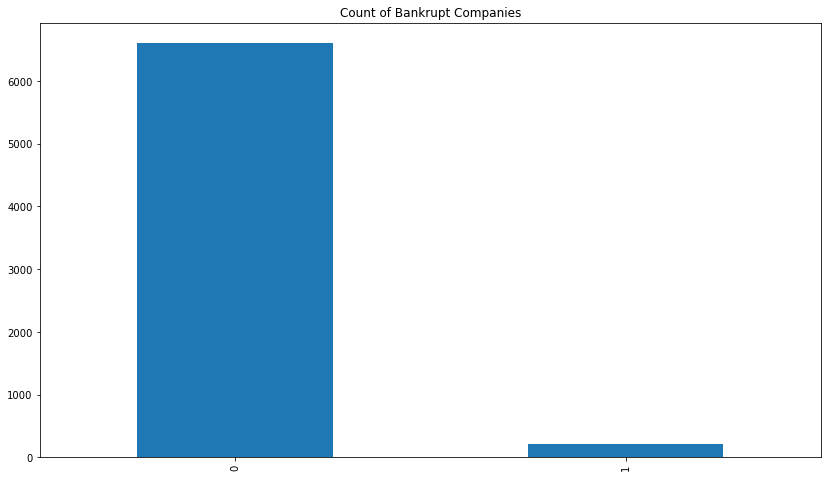

In [7]:
data["Bankrupt?"].value_counts().plot(kind='bar', figsize=(14,8), title = "Count of Bankrupt Companies")

In [8]:
y = data["Bankrupt?"]
X = data.drop(columns=["Bankrupt?"])

Split-out test/validation dataset

In [9]:
X_sub, X_test, y_sub, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_sub, y_sub, test_size = 0.25, random_state=random_state, stratify=y_sub)

<AxesSubplot:title={'center':'Count of Bankrupt Companies'}>

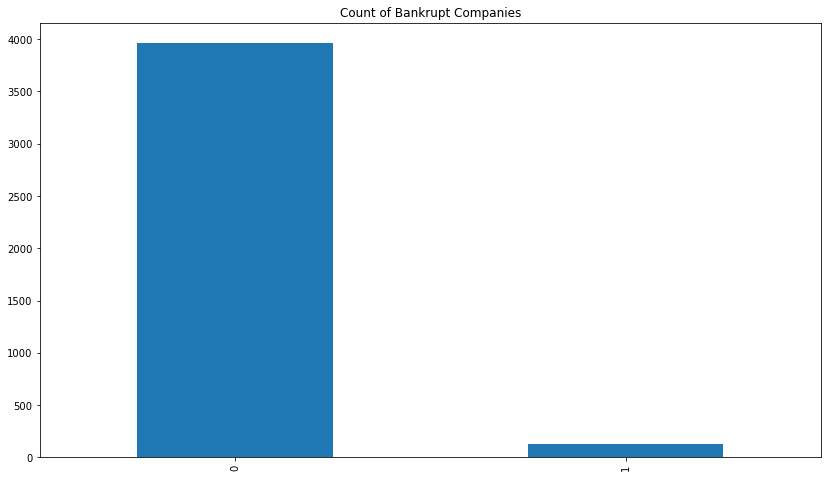

In [10]:
y_train.value_counts().plot(kind='bar', figsize=(14,8), title = "Count of Bankrupt Companies")

Data Sampling

In [11]:
over = SMOTE(sampling_strategy=0.1, k_neighbors=5, random_state=random_state)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=random_state)

In [12]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

<AxesSubplot:title={'center':'Count of Bankrupt Companies'}>

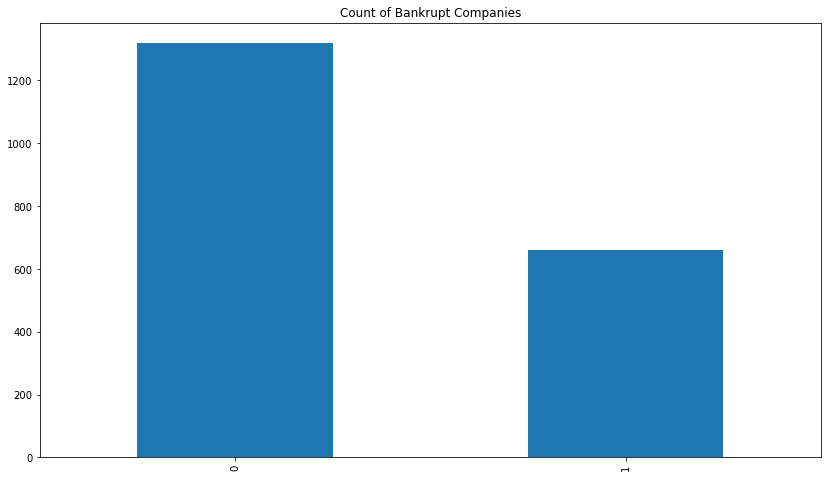

In [13]:
X_resamp, y_resamp = pipeline.fit_resample(X, y)
y_resamp.value_counts().plot(kind='bar', figsize=(14,8), title = "Count of Bankrupt Companies")

Initial Algorithm Analysis

In [45]:
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'kappa': make_scorer(cohen_kappa_score)}

pipelines = []
results = []
names = []
pipelines.append(('ResampledLR', Pipeline([('over', over), ('under', under),('LR',
LogisticRegression(random_state=random_state))])))
pipelines.append(('ResampledKNN', Pipeline([('over', over), ('under', under),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ResampledRF', Pipeline([('over', over), ('under', under),('CART',
RandomForestClassifier(random_state=random_state))])))
pipelines.append(('ResampledNB', Pipeline([('over', over), ('under', under),('NB',
GaussianNB())])))
pipelines.append(('ResampledSVM', Pipeline([('over', over), ('under', under),('SVM', SVC(random_state=random_state))])))

for name, model in pipelines:
  kfold = KFold(n_splits=10, random_state=random_state, shuffle=True)
  cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = f"{name}: AUC = {cv_results['test_AUC'].mean()} ({cv_results['test_AUC'].std()}) Accuracy = {cv_results['test_Accuracy'].mean()} ({cv_results['test_Accuracy'].std()}) Kappa = {cv_results['test_kappa'].mean()} ({cv_results['test_kappa'].std()})"
  print(msg)


ResampledLR: AUC = 0.6478933944103813 (0.057950923930604435) Accuracy = 0.8753336513805235 (0.02046980358085417) Kappa = 0.05362621412439876 (0.04884343009351278)
ResampledKNN: AUC = 0.64557433413418 (0.07780798558653548) Accuracy = 0.8134903691335202 (0.02836225864747882) Kappa = 0.053834417699018214 (0.043817146762965616)
ResampledRF: AUC = 0.9483453616953141 (0.02934276395390571) Accuracy = 0.939137098216948 (0.009789863640258583) Kappa = 0.4124063571863319 (0.07228093580665361)
ResampledNB: AUC = 0.6294555293646337 (0.07502424156173124) Accuracy = 0.06819846144671715 (0.013588733932123722) Kappa = -0.0003982657128204448 (0.0022724658933096446)
ResampledSVM: AUC = 0.7127614188018384 (0.08855055027218534) Accuracy = 0.9049114437354643 (0.010240273358765721) Kappa = 0.1172934412575588 (0.06903525549956666)


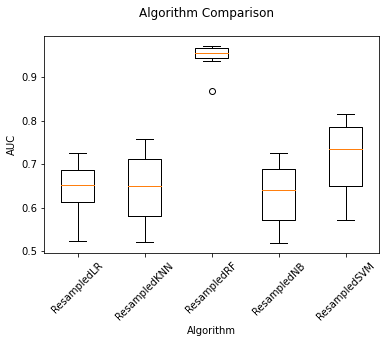

In [46]:
AUC_results=[x['test_AUC'] for x in results]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(AUC_results)
ax.set_xlabel('Algorithm')
ax.set_ylabel('AUC')
ax.set_xticklabels(names)
plt.xticks(rotation = 45)
plt.show()

Feature Selection

Feature 0:  ROA(C) before interest and depreciation before interest, Score: 0.01134
Feature 1:  ROA(A) before interest and % after tax, Score: 0.01144
Feature 2:  ROA(B) before interest and depreciation after tax, Score: 0.01305
Feature 3:  Operating Gross Margin, Score: 0.00580
Feature 4:  Realized Sales Gross Margin, Score: 0.00641
Feature 5:  Operating Profit Rate, Score: 0.00559
Feature 6:  Pre-tax net Interest Rate, Score: 0.00740
Feature 7:  After-tax net Interest Rate, Score: 0.00904
Feature 8:  Non-industry income and expenditure/revenue, Score: 0.01504
Feature 9:  Continuous interest rate (after tax), Score: 0.01158
Feature 10:  Operating Expense Rate, Score: 0.00901
Feature 11:  Research and development expense rate, Score: 0.00813
Feature 12:  Cash flow rate, Score: 0.00590
Feature 13:  Interest-bearing debt interest rate, Score: 0.01180
Feature 14:  Tax rate (A), Score: 0.00061
Feature 15:  Net Value Per Share (B), Score: 0.01579
Feature 16:  Net Value Per Share (A), Score:

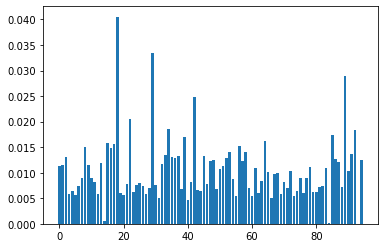

In [47]:
RF = RandomForestClassifier(random_state=random_state)
RF.fit(X_train, y_train)
importance = RF.feature_importances_
for i,v in enumerate(importance):
    print('Feature %0d: %s, Score: %.5f' % (i,X_train.columns[i],v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [48]:
figure(figsize=(20, 20), dpi=1000)
tree.plot_tree(RF.estimators_[5], max_depth=4)
plt.show()

Optimal number of features : 50


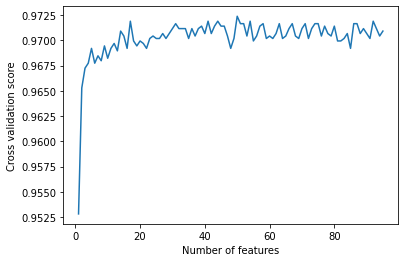

In [49]:
estimator = RandomForestClassifier(random_state=random_state) 

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=random_state) 

rfecv = RFECV(estimator=estimator, step=1, cv=cv,
              scoring='accuracy',
              min_features_to_select=1, n_jobs=-1)

rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [50]:
most_relevent_cols = X_train.columns[rfecv.support_]

In [51]:
print(most_relevent_cols)

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(B) before interest and depreciation after tax',
       ' Pre-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Net Value Per Share (A)', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Current Ratio', ' Quick Ratio',
       ' Interest Expense Ratio', ' Total debt/Total net worth',
       ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Revenue per person', ' Operat

In [52]:
X_train = X_train[most_relevent_cols]
X_val = X_val[most_relevent_cols]

In [53]:
X_train.describe()

ROA(C) before interest and depreciation before interest  \
count                                        4091.000000          
mean                                            0.504224          
std                                             0.059407          
min                                             0.024277          
25%                                             0.475503          
50%                                             0.501926          
75%                                             0.534612          
max                                             1.000000          

        ROA(B) before interest and depreciation after tax  \
count                                        4091.000000    
mean                                            0.552622    
std                                             0.060057    
min                                             0.033514    
25%                                             0.526581    
50%                                             0.551421    
75%                                             0.583222    
max                                             1.000000    

        Pre-tax net Interest Rate  \
count                 4091.000000   
mean                     0.797188   
std                      0.010414   
min                      0.160516   
25%                      0.797385   
50%                      0.797462   
75%                      0.797581   
max                      0.809513   

        Non-industry income and expenditure/revenue  \
count                                   4091.000000   
mean                                       0.303392   
std                                        0.006116   
min                                        0.000000   
25%                                        0.303467   
50%                                        0.303525   
75%                                        0.303584   
max                                        0.329207   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            4091.000000             4.091000e+03   
mean                                0.781383             1.995791e+09   
std                                 0.010254             3.236071e+09   
min                                 0.133479             1.000256e-04   
25%                                 0.781565             1.565718e-04   
50%                                 0.781632             2.757930e-04   
75%                                 0.781738             4.145000e+09   
max                                 0.795631             9.990000e+09   

        Interest-bearing debt interest rate   Net Value Per Share (B)  \
count                          4.091000e+03               4091.000000   
mean                           1.656514e+07                  0.189863   
std                            1.075897e+08                  0.030571   
min                            0.000000e+00                  0.000000   
25%                            2.075208e-04                  0.173528   
50%                            3.240324e-04                  0.184021   
75%                            5.445545e-04                  0.199317   
max                            9.900000e+08                  0.534280   

        Net Value Per Share (A)   Net Value Per Share (C)  ...  \
count               4091.000000               4091.000000  ...   
mean                   0.189834                  0.189866  ...   
std                    0.030638                  0.030652  ...   
min                    0.000000                  0.000000  ...   
25%                    0.173549                  0.173570  ...   
50%                    0.184021                  0.184063  ...   
75%                    0.199338                  0.199359  ...   
max                    0.534280                  0.534280  ...   

        Cash Flow to Liability   Current Liability to Current Assets  \
count              4091.000000           

Data visualizations

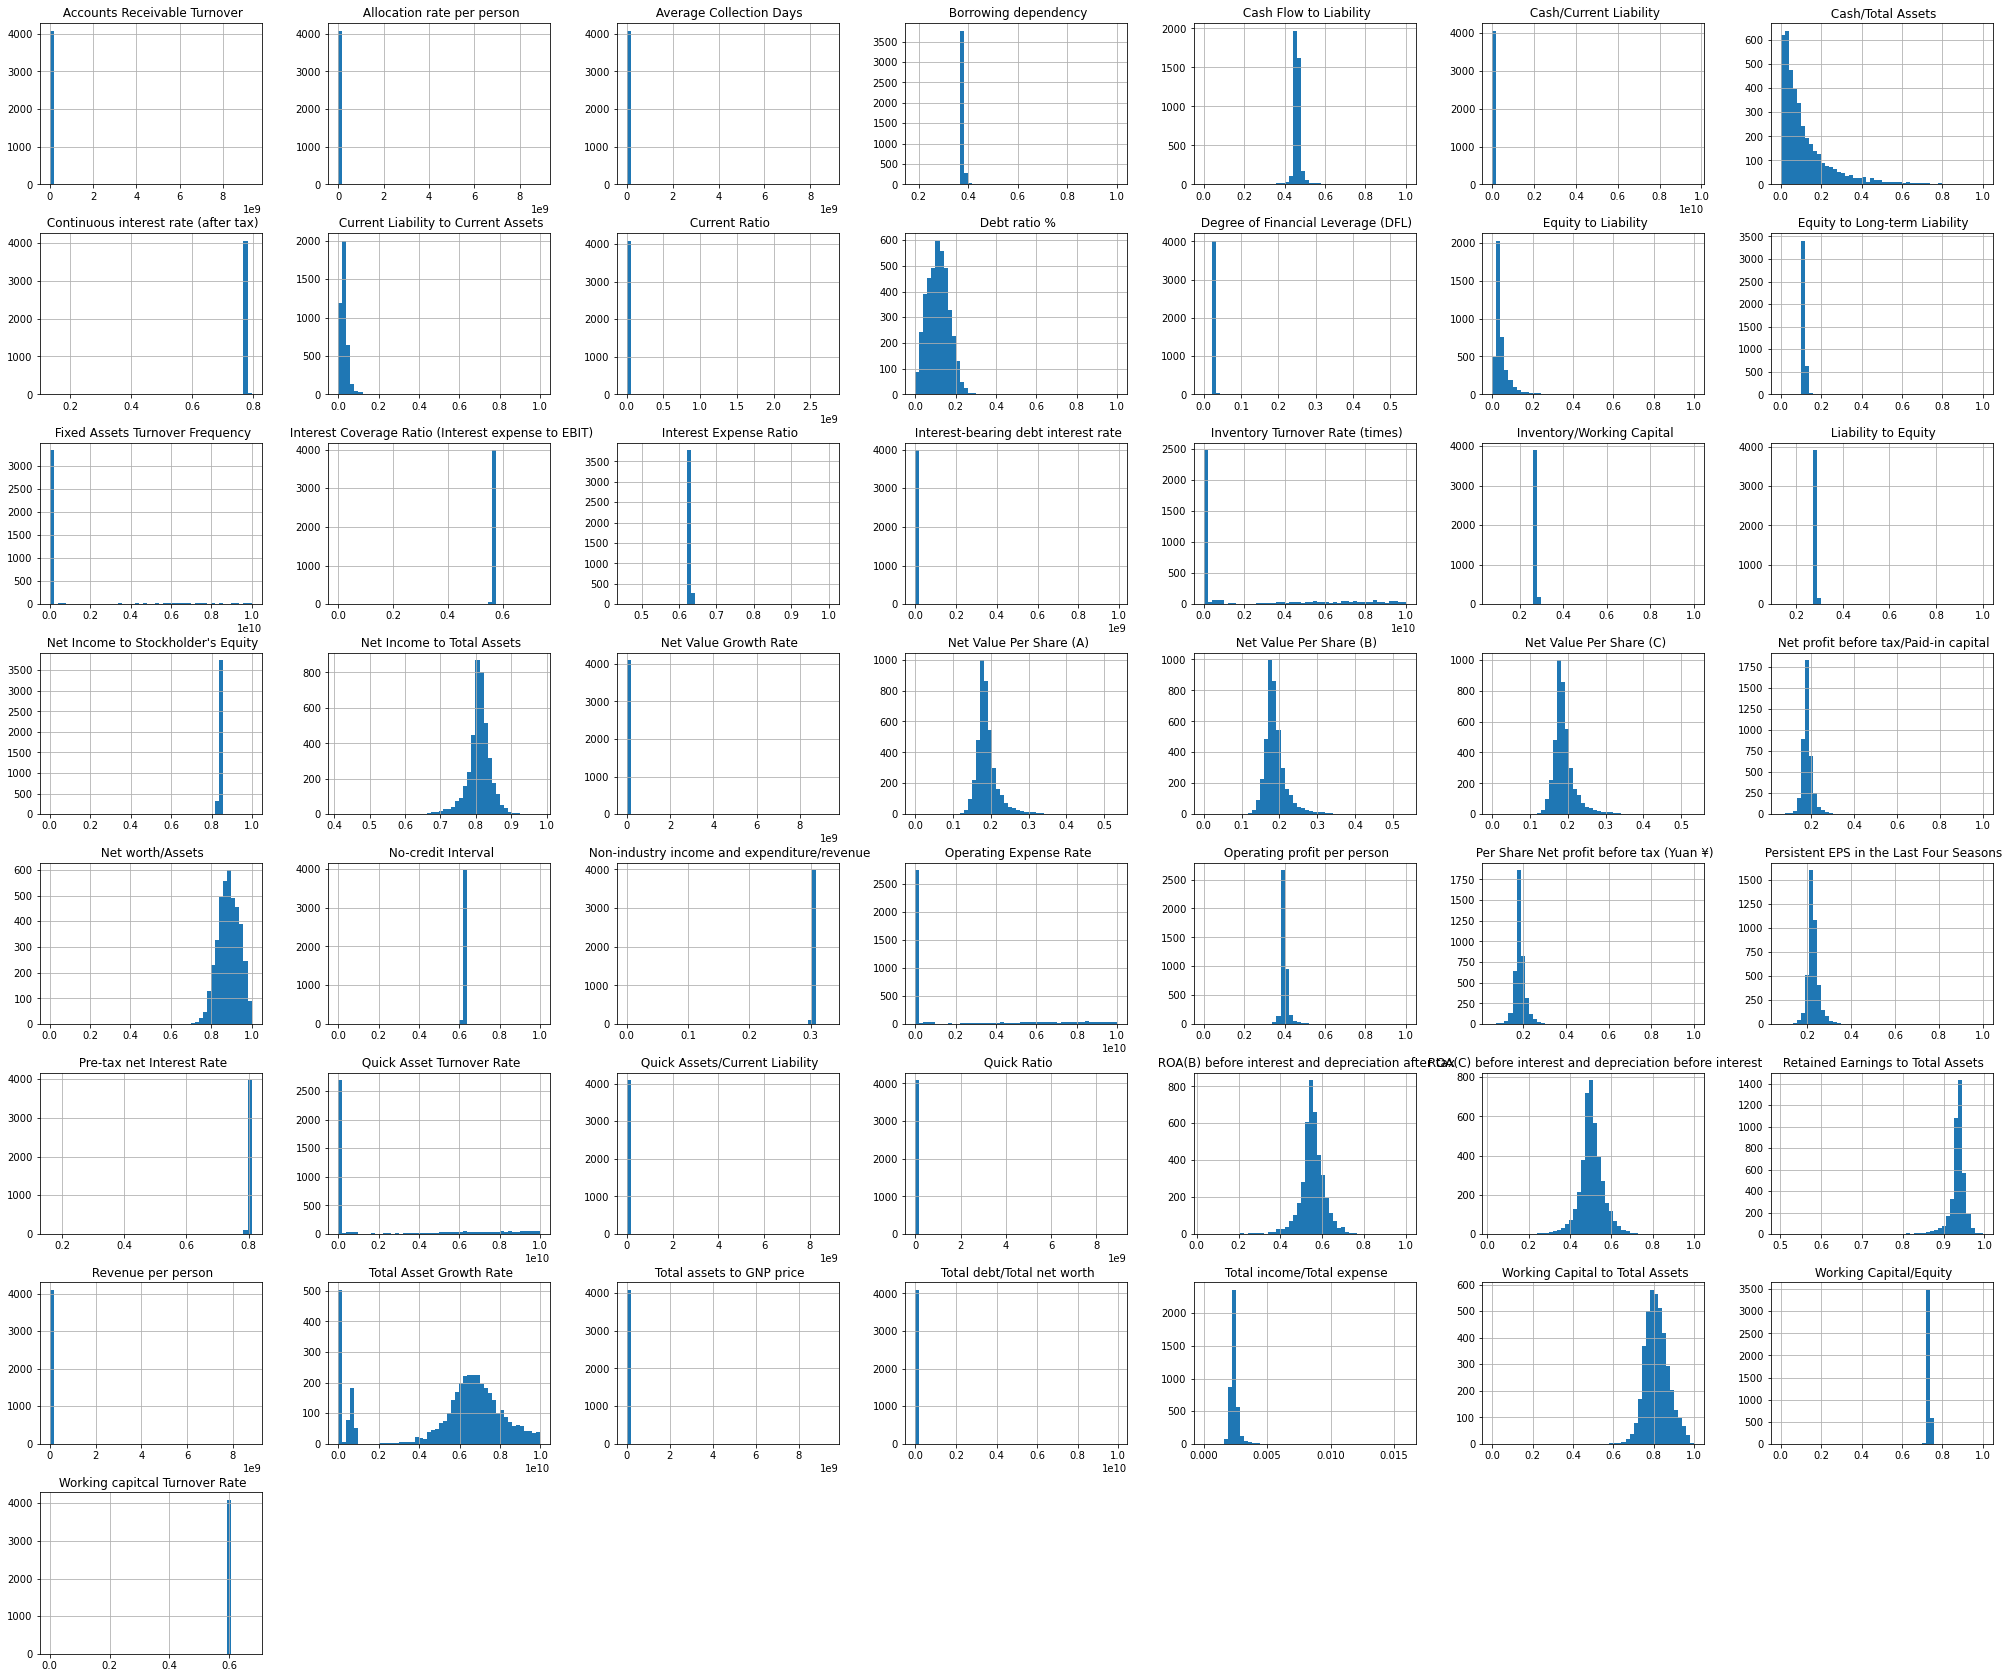

In [54]:
X_train.hist(figsize = (35,30), bins = 50)
plt.show()

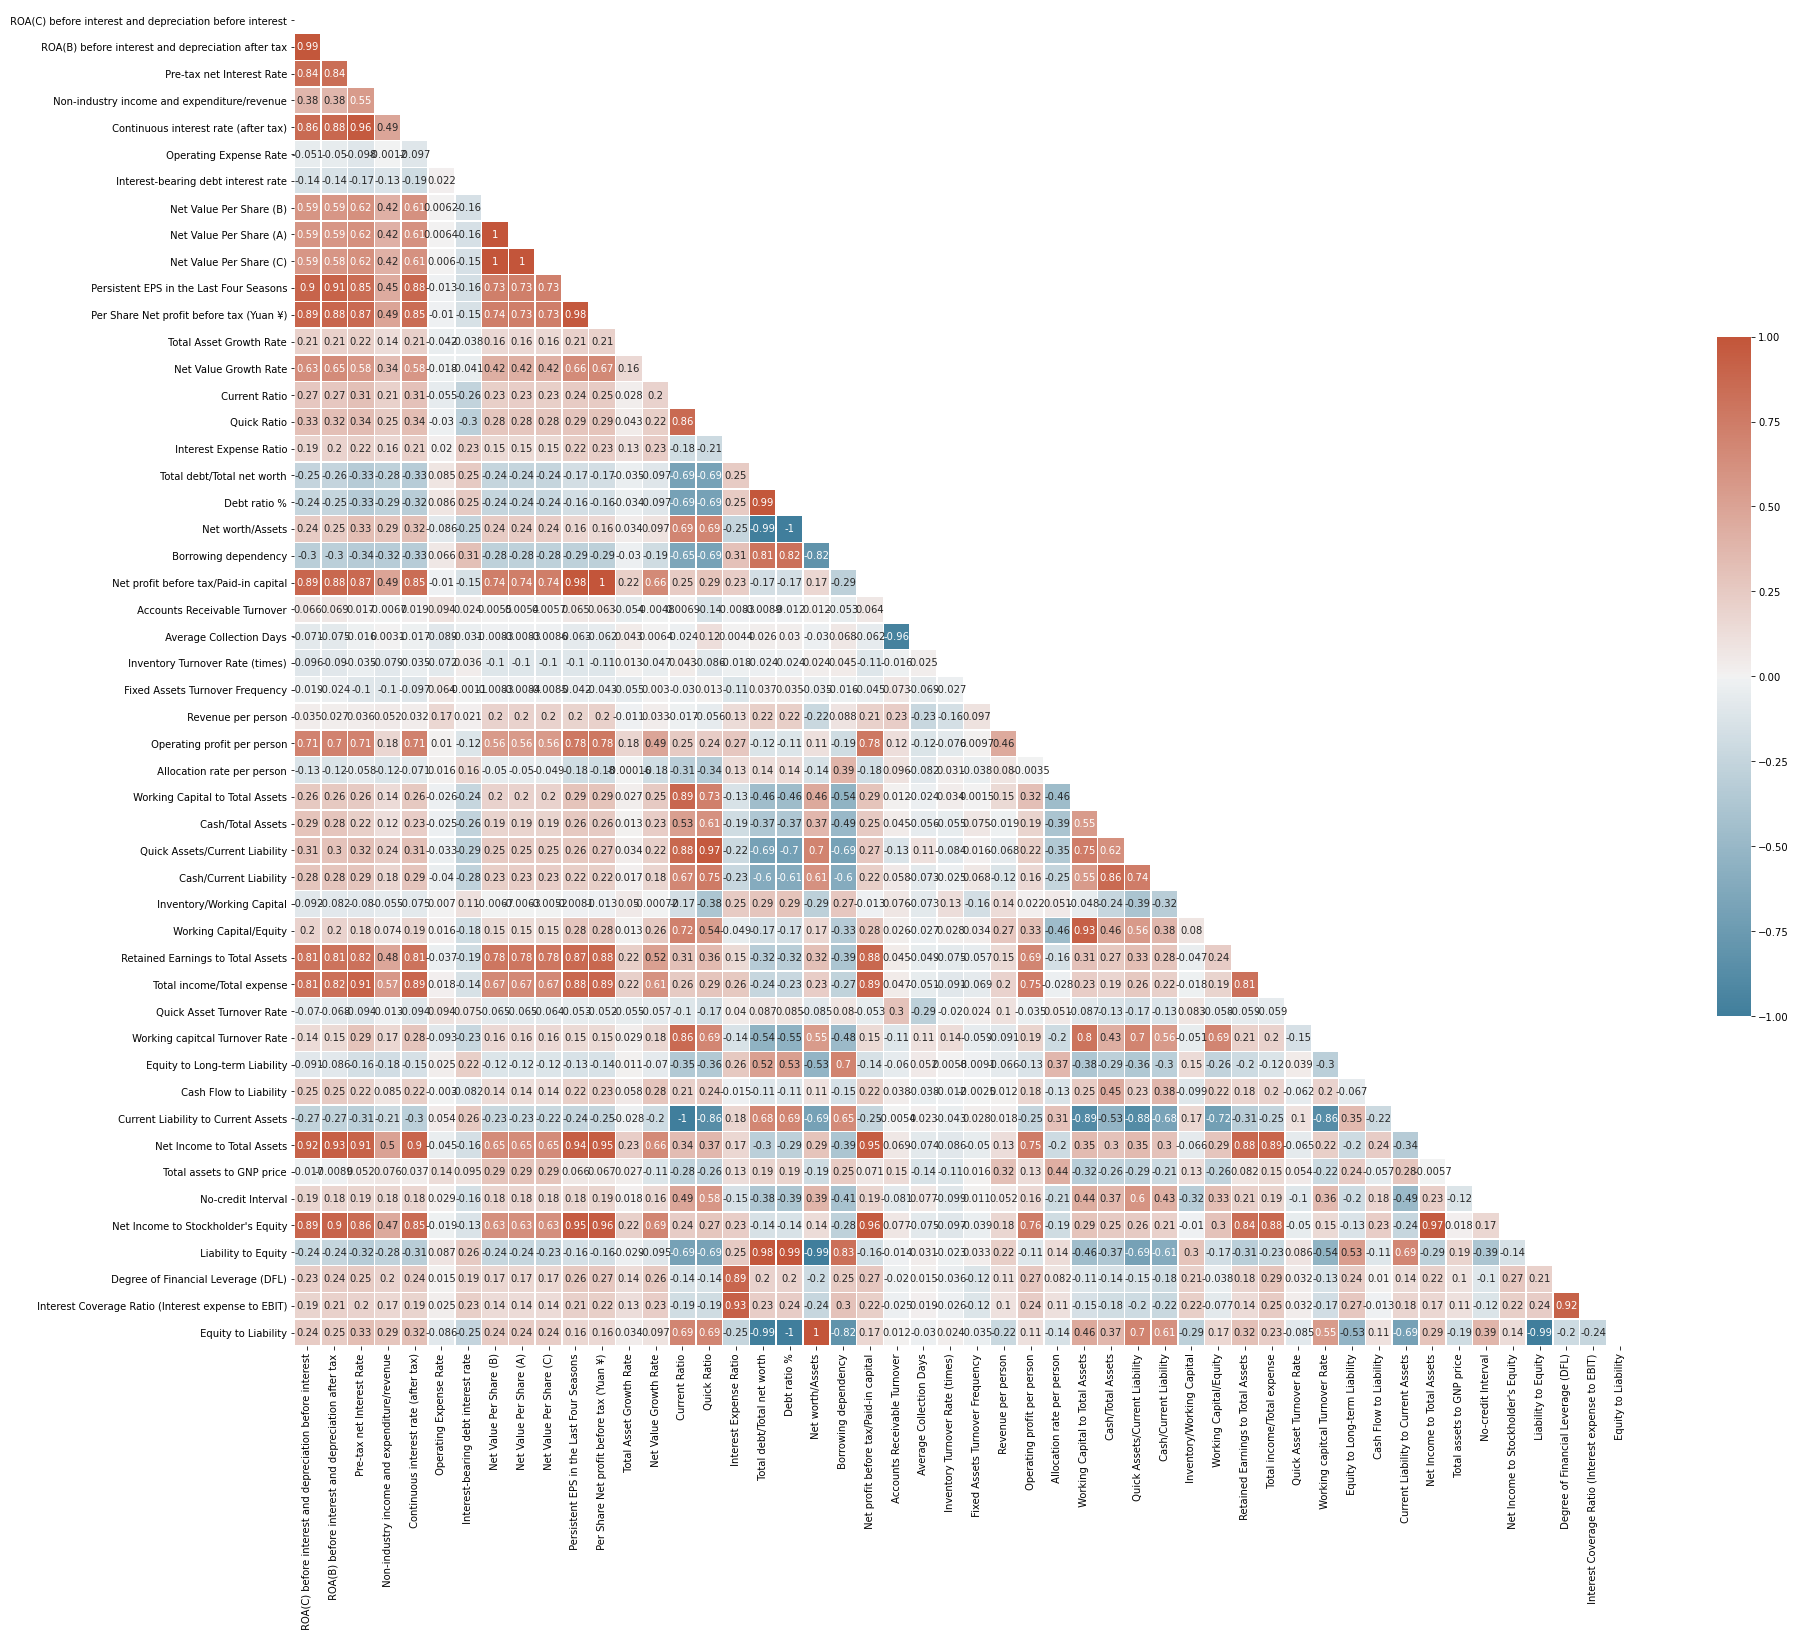

In [55]:
f, ax = plt.subplots(figsize=(30, 25))
mat = X_train.corr('spearman')  
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


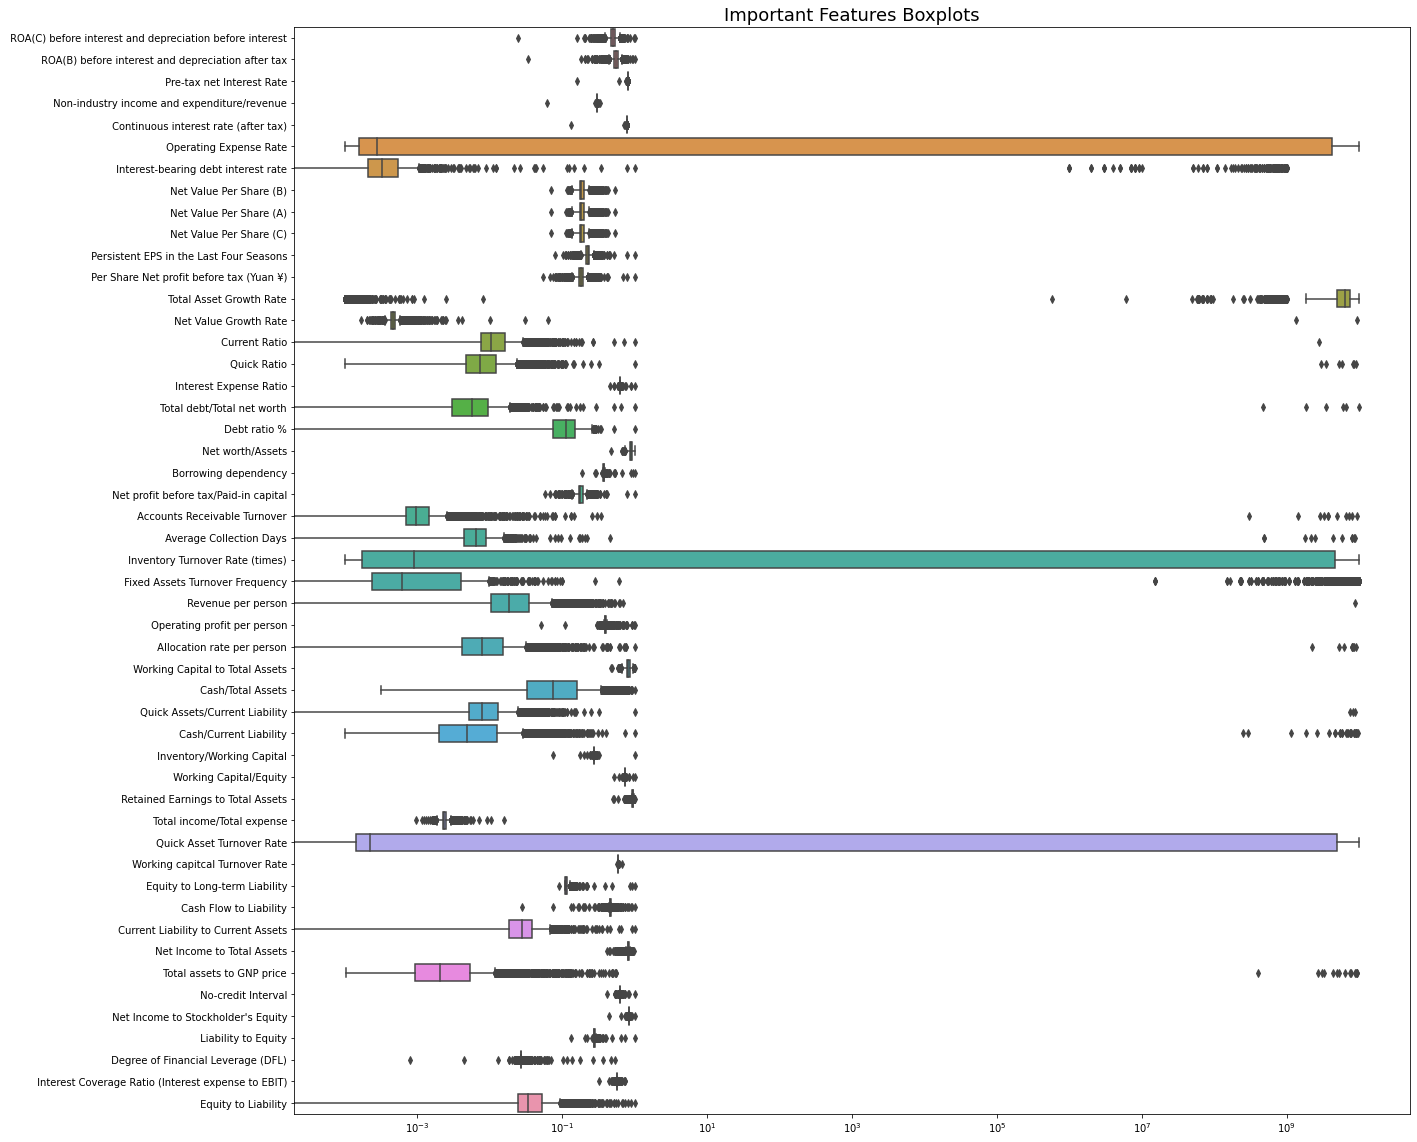

In [56]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data= X_train, orient="h")
ax.set_title('Important Features Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

Second Analysis after Data Transforms

In [58]:
pipelines = []
pipelines.append(('ResampledLR', Pipeline([('StandardScaler', StandardScaler()), ('over', over), ('under', under),('LR',
LogisticRegression(random_state=random_state))])))
pipelines.append(('ResampledKNN', Pipeline([('StandardScaler', StandardScaler()),('over', over), ('under', under),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ResampledRF', Pipeline([('StandardScaler', StandardScaler()),('over', over), ('under', under),('CART',
RandomForestClassifier(random_state=random_state))])))
pipelines.append(('ResampledNB', Pipeline([('StandardScaler', StandardScaler()),('over', over), ('under', under),('NB',
GaussianNB())])))
pipelines.append(('ResampledSVM', Pipeline([('StandardScaler', StandardScaler()),('over', over), ('under', under),('SVM', SVC(random_state=random_state))])))
results = []
names = []

for name, model in pipelines:
  kfold = KFold(n_splits=10, random_state=random_state, shuffle=True)
  cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = f"{name}: AUC = {cv_results['test_AUC'].mean()} ({cv_results['test_AUC'].std()}) Accuracy = {cv_results['test_Accuracy'].mean()} ({cv_results['test_Accuracy'].std()}) Kappa = {cv_results['test_kappa'].mean()} ({cv_results['test_kappa'].std()})"
  print(msg)


ResampledLR: AUC = 0.9067292138303371 (0.045974033212574913) Accuracy = 0.9210495557278311 (0.012152625876259026) Kappa = 0.34512411831087003 (0.10636109685293191)
ResampledKNN: AUC = 0.8827208230329446 (0.07012052668012182) Accuracy = 0.8829220585604389 (0.021822884773661354) Kappa = 0.2525244906746256 (0.08786222929123318)
ResampledRF: AUC = 0.9497727936939832 (0.02296921173121375) Accuracy = 0.9371840896893078 (0.012768586789767533) Kappa = 0.39853732959167126 (0.11584537532314797)
ResampledNB: AUC = 0.8581788652064434 (0.08303202947243447) Accuracy = 0.6511568966545411 (0.22980316820230742) Kappa = 0.13467036921542763 (0.09682856390546803)
ResampledSVM: AUC = 0.9292830205446145 (0.025429863456218185) Accuracy = 0.9164076569861053 (0.01478170436240279) Kappa = 0.3106614404524778 (0.08199848715561804)


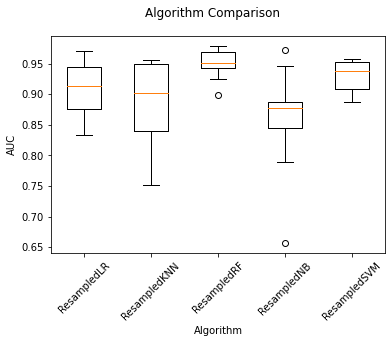

In [59]:
AUC_results=[x['test_AUC'] for x in results]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(AUC_results)
ax.set_xlabel('Algorithm')
ax.set_ylabel('AUC')
ax.set_xticklabels(names)
plt.xticks(rotation = 45)
plt.show()

Feature Extraction

In [66]:
scores=PCA(random_state=random_state).fit(X_train)

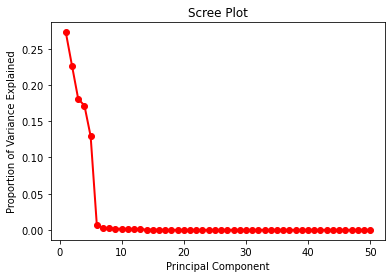

In [67]:
PC_values = np.arange(scores.n_components_) + 1
plt.plot(PC_values, scores.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

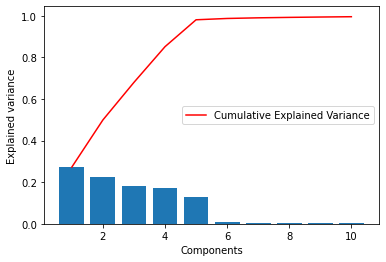

In [70]:
ev_subset = scores.explained_variance_ratio_[:10]

plt.bar(range(1,len(ev_subset)+1),ev_subset)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(ev_subset)+1),
         np.cumsum(ev_subset),
         c='red',
         label="Cumulative Explained Variance")
plt.legend()

In [75]:
np.cumsum(np.round(scores.explained_variance_ratio_, decimals=3)*100)

array([27.3, 49.9, 68. , 85.2, 98.1, 98.7, 99. , 99.2, 99.4, 99.5, 99.6,
       99.7, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8])

Third Analysis after PCA data transform

In [77]:
n_components=5

In [78]:
pipelines = []
pipelines.append(('ResampledLR', Pipeline([('StandardScaler', StandardScaler()),
  ('over', over), ('under', under), ('pca', PCA(n_components=n_components)), ('LR', LogisticRegression())])))
pipelines.append(('ResampledKNN', Pipeline([('StandardScaler', StandardScaler()),
  ('over', over), ('under', under), ('pca', PCA(n_components=n_components)), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ResampledRF', Pipeline([('over', over), ('under', under), ('CART', RandomForestClassifier())])))
pipelines.append(('ResampledNB', Pipeline([('StandardScaler', StandardScaler()),
  ('over', over), ('under', under),('NB', GaussianNB())])))
pipelines.append(('ResampledSVM', Pipeline([('StandardScaler', StandardScaler()),
  ('over', over), ('under', under),  ('pca', PCA(n_components=n_components)), ('SVM', SVC())])))
results = []
names = []

for name, model in pipelines:
  kfold = KFold(n_splits=10, random_state=random_state, shuffle=True)
  cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = f"{name}: AUC = {cv_results['test_AUC'].mean()} ({cv_results['test_AUC'].std()}) Accuracy = {cv_results['test_Accuracy'].mean()} ({cv_results['test_Accuracy'].std()}) Kappa = {cv_results['test_kappa'].mean()} ({cv_results['test_kappa'].std()})"
  print(msg)

ResampledLR: AUC = 0.9341465299010266 (0.027471730149257655) Accuracy = 0.921051941081758 (0.014090473824143121) Kappa = 0.34420633215682395 (0.11017526066570758)
ResampledKNN: AUC = 0.8862280915441675 (0.04081402740502858) Accuracy = 0.8897626572842745 (0.014021372850397645) Kappa = 0.27011159329570006 (0.06428680163980525)
ResampledRF: AUC = 0.9492948746461775 (0.022238664035518885) Accuracy = 0.9376712982288747 (0.008872086743260121) Kappa = 0.40581192735875415 (0.09428646790414326)
ResampledNB: AUC = 0.8581788652064434 (0.08303202947243447) Accuracy = 0.6511568966545411 (0.22980316820230742) Kappa = 0.13467036921542763 (0.09682856390546803)
ResampledSVM: AUC = 0.9337825677083158 (0.024529828483200327) Accuracy = 0.9085836961059097 (0.012914391634341727) Kappa = 0.3141931681187953 (0.085397806293928)


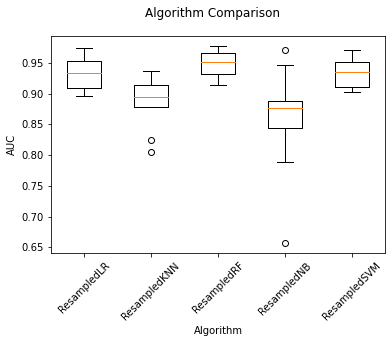

In [79]:
AUC_results=[x['test_AUC'] for x in results]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(AUC_results)
ax.set_xlabel('Algorithm')
ax.set_ylabel('AUC')
ax.set_xticklabels(names)
plt.xticks(rotation = 45)
plt.show()

Algorithm Hyperparameter Tuning

In [83]:
pipe_LR = Pipeline([('StandardScaler', StandardScaler()), ('over', over), ('under', under), ('pca', PCA(n_components=n_components)), ('LR', LogisticRegression(random_state=random_state))])
pipe_KNN = Pipeline([('StandardScaler', StandardScaler()), ('over', over), ('under', under), ('pca', PCA(n_components=n_components)), ('KNN', KNeighborsClassifier())])
pipe_RF = Pipeline([('StandardScaler', StandardScaler()), ('over', over), ('under', under), ('RF', RandomForestClassifier(random_state=random_state))])
pipe_NB = Pipeline([('StandardScaler', StandardScaler()), ('over', over), ('under', under), ('NB', GaussianNB())])
pipe_SVM = Pipeline([('StandardScaler', StandardScaler()), ('over', over), ('under', under), ('pca', PCA(n_components=n_components)), ('SVM', SVC(random_state=random_state))])

In [84]:
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sampling_ratio = ['auto', 0.1, 0.2, 0.3, 0.4, 0.5]
param_range_fl = [1.0, 0.5, 0.1]
grid_params_lr = [{'over__sampling_strategy':sampling_ratio, 
                   'under__sampling_strategy':sampling_ratio, 
                   'LR__penalty':['l1', 'l2'], 
                   'LR__C':param_range_fl}] 

grid_params_knn = [{'over__sampling_strategy':sampling_ratio, 
                    'under__sampling_strategy':sampling_ratio, 
                    'KNN__n_neighbors':param_range[1:]}]

grid_params_rf = [{'RF__criterion': ['gini', 'entropy'],
                        'RF__min_samples_leaf': param_range,
                        'RF__max_depth': param_range + [None],
                        'RF__min_samples_split': param_range[1:]}]

grid_params_nb = [{'over__sampling_strategy':sampling_ratio, 
                   'under__sampling_strategy':sampling_ratio}]

grid_params_svm = [{'over__sampling_strategy':sampling_ratio, 
                    'under__sampling_strategy':sampling_ratio, 
                    'SVM__kernel': ['linear', 'rbf'], 
                    'SVM__C': param_range}]

In [85]:
jobs = -1
gs_lr = GridSearchCV(estimator=pipe_LR,
            param_grid=grid_params_lr,
            scoring=scoring, refit='AUC',
            cv=cv, n_jobs=jobs)

gs_knn = GridSearchCV(estimator=pipe_KNN,
            param_grid=grid_params_knn,
            scoring=scoring, refit='AUC',
            cv=cv, n_jobs=jobs)

gs_rf = GridSearchCV(estimator=pipe_RF,
            param_grid=grid_params_rf,
            scoring=scoring, refit='AUC',
            cv=cv, n_jobs=jobs)

gs_nb = GridSearchCV(estimator=pipe_NB,
            param_grid=grid_params_nb,
            scoring=scoring, refit='AUC',
            cv=cv, n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_SVM,
            param_grid=grid_params_svm,
            scoring=scoring, refit='AUC',
            cv=cv, n_jobs=jobs)

grids = [gs_lr, gs_knn, gs_rf, gs_nb, gs_svm]

In [86]:
grid_dict = {0: 'Logistic Regression', 1: 'K-Nearest Neighbor', 
        2: 'Random Forest', 3: 'Naive Bayes', 
        4: 'Support Vector Machine'}

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

print('Performing model optimizations...')
best_auc = 0.0
best_clf = 0
best_gs = None
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params: %s' % gs.best_params_)
    print('Best training auc: %.3f' % gs.best_score_)
    if grid_dict[idx] == 'Support Vector Machine':
        y_pred = gs.predict(X_val)
    else:
        y_pred = gs.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print('Test set auc score for best params: %.3f ' % auc)
    if auc > best_auc:
          best_auc = auc
          best_gs = gs
          best_clf = idx
            
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'LR__C': 0.1, 'LR__penalty': 'l2', 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 0.4}
Best training auc: 0.937
Test set auc score for best params: 0.894 

Estimator: K-Nearest Neighbor
Best params: {'KNN__n_neighbors': 10, 'over__sampling_strategy': 0.1, 'under__sampling_strategy': 'auto'}
Best training auc: 0.910
Test set auc score for best params: 0.873 

Estimator: Random Forest
Best params: {'RF__criterion': 'gini', 'RF__max_depth': 9, 'RF__min_samples_leaf': 3, 'RF__min_samples_split': 9}
Best training auc: 0.950
Test set auc score for best params: 0.913 

Estimator: Naive Bayes
Best params: {'over__sampling_strategy': 0.1, 'under__sampling_strategy': 'auto'}
Best training auc: 0.882
Test set auc score for best params: 0.771 

Estimator: Support Vector Machine
Best params: {'SVM__C': 9, 'SVM__kernel': 'linear', 'over__sampling_strategy': 0.4, 'under__sampling_strategy': 0.4}
Best training

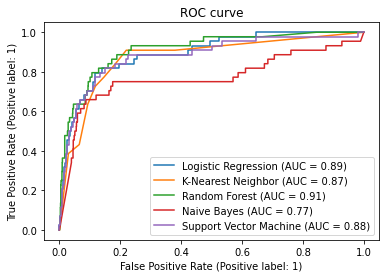

In [88]:
from sklearn import set_config
set_config(display='diagram')

fig, ax = plt.subplots()

model_displays = {}
for name, pipeline in zip(grid_dict.values(), grids):
    model_displays[name] = plot_roc_curve(
        pipeline, X_val, y_val, ax=ax, name=name)
_ = ax.set_title('ROC curve')

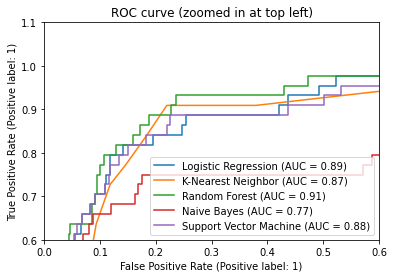

In [89]:
fig, ax = plt.subplots()
for name, pipeline in zip(grid_dict.values(), grids):
    model_displays[name].plot(ax=ax)

ax.set_xlim(0, 0.6)
ax.set_ylim(0.6, 1.1)
_ = ax.set_title('ROC curve (zoomed in at top left)')

Predictions on validation dataset

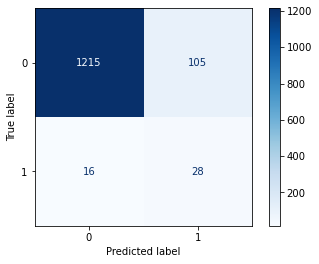

In [90]:
plot_confusion_matrix(best_gs, X_val, y_val, cmap=plt.cm.Blues)

Predictions on test dataset

In [91]:
X_test = X_test[most_relevent_cols]
print(classification_report(y_test, best_gs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1320
           1       0.23      0.68      0.35        44

    accuracy                           0.92      1364
   macro avg       0.61      0.80      0.65      1364
weighted avg       0.96      0.92      0.94      1364



In [92]:
best_gs.best_params_

{'RF__criterion': 'gini',
 'RF__max_depth': 9,
 'RF__min_samples_leaf': 3,
 'RF__min_samples_split': 9}

In [94]:
pipeline = ('ResampledRF', Pipeline([('over', over), ('under', under), ('CART', RandomForestClassifier(criterion='entropy', 
max_depth=8, min_samples_leaf=3, min_samples_split=7, random_state=random_state))]))
name, model = pipeline
kfold = KFold(n_splits=10, random_state=random_state, shuffle=True)
cv_results = cross_validate(model, X_test, y_test, cv=kfold, scoring=scoring)
results.append(cv_results)
msg = f"{name}: AUC = {cv_results['test_AUC'].mean()} ({cv_results['test_AUC'].std()}) Accuracy = {cv_results['test_Accuracy'].mean()} ({cv_results['test_Accuracy'].std()}) Kappa = {cv_results['test_kappa'].mean()} ({cv_results['test_kappa'].std()})"
print(msg)

ResampledRF: AUC = 0.9393618798274701 (0.057804576389974674) Accuracy = 0.9120384285100902 (0.01821024158814589) Kappa = 0.29317028292775854 (0.1276880316482401)


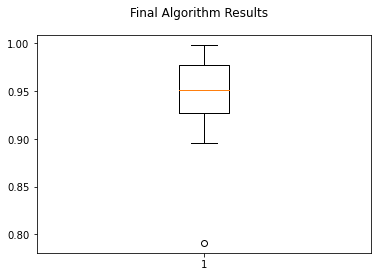

In [95]:
fig = plt.figure()
fig.suptitle('Final Algorithm Results')
plt.boxplot(cv_results['test_AUC'])
ax.set_xlabel('ResampledRF')
ax.set_ylabel('AUC')
plt.show()

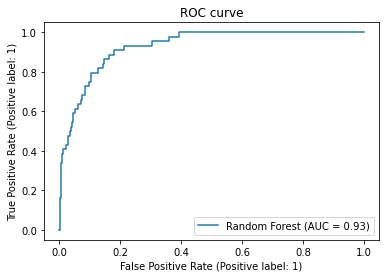

In [96]:
fig, ax = plt.subplots()
plot_roc_curve(best_gs, X_test, y_test, ax=ax, name=grid_dict[best_clf])
_ = ax.set_title('ROC curve')

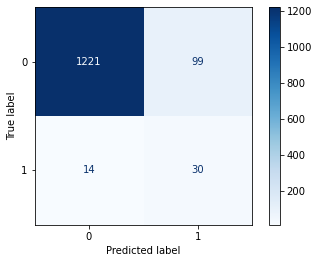

In [97]:
plot_confusion_matrix(best_gs, X_test, y_test, cmap=plt.cm.Blues)

In [98]:
print(cohen_kappa_score(y_test, best_gs.predict(X_test)))

0.3138099902056808


Save model for later use

In [99]:
filename = 'finalized_model.pkl'
dump(best_gs, open(filename, 'wb'))

In [100]:
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9288567493112947
